In [1]:
import warnings 
warnings.filterwarnings('ignore') #to ignore the warnings

In [2]:
# PART II OF THE PROJECT : DETERMINING THE EFFICIENCY OF STP
import pandas as pd #open source python library for data analysis & manipulation
import seaborn as sns #data vsualization library for creating informative statistical graphics

In [3]:
import numpy as np #library for numerical computing in python
import matplotlib.pyplot as plt #creating plots & charts

In [4]:
df = pd.read_csv("STP.csv") #reads .csv file from pandas & save it in df

In [5]:
df.shape #returns tuple containing the number of rows & columns

(1739, 5)

In [7]:
df.info #gives summary of the data i.e. data type, no of missing values

<bound method DataFrame.info of         PH   TSS   COD   BOD  POTABILITY
0     7.20  13.0  31.0   7.0           1
1     7.40  13.0  26.0   9.0           1
2     7.46  14.0  43.0   8.0           1
3     7.46  12.0  46.0  10.0           0
4     7.44  13.0  44.0   9.0           1
...    ...   ...   ...   ...         ...
1734  7.18  13.0  36.0   7.0           0
1735  7.05  10.0  26.0  16.0           1
1736  7.03  11.0  21.0   9.0           0
1737  7.07  11.0  26.0   9.0           0
1738  7.14  12.0  18.0  14.0           1

[1739 rows x 5 columns]>

In [8]:
df.isnull().sum() #calculates the no of missing values in df

PH            0
TSS           0
COD           0
BOD           0
POTABILITY    0
dtype: int64

In [9]:
df.describe #generates the descriptive statistics for the numerical columns

<bound method NDFrame.describe of         PH   TSS   COD   BOD  POTABILITY
0     7.20  13.0  31.0   7.0           1
1     7.40  13.0  26.0   9.0           1
2     7.46  14.0  43.0   8.0           1
3     7.46  12.0  46.0  10.0           0
4     7.44  13.0  44.0   9.0           1
...    ...   ...   ...   ...         ...
1734  7.18  13.0  36.0   7.0           0
1735  7.05  10.0  26.0  16.0           1
1736  7.03  11.0  21.0   9.0           0
1737  7.07  11.0  26.0   9.0           0
1738  7.14  12.0  18.0  14.0           1

[1739 rows x 5 columns]>

In [10]:
df.fillna(df.mean(),inplace=True) # replaces null value with specified value
df #read new df

,PH,TSS,COD,BOD,POTABILITY
0,7.20,13.0,31.0,7.0,1
1,7.40,13.0,26.0,9.0,1
2,7.46,14.0,43.0,8.0,1
3,7.46,12.0,46.0,10.0,0
4,7.44,13.0,44.0,9.0,1
...,...,...,...,...,...
1734,7.18,13.0,36.0,7.0,0
1735,7.05,10.0,26.0,16.0,1
1736,7.03,11.0,21.0,9.0,0
1737,7.07,11.0,26.0,9.0,0


In [11]:
#DATA CLEANING HAS BEEN PERFORMED
#NO NULL VALUES HAVE BEEN FOUND IN THE DATASET

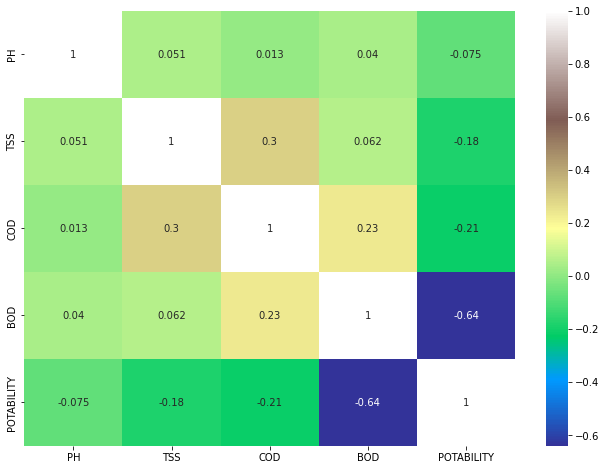

In [12]:
# DETERMINING CORRELATION USING HEATMAP
sns.heatmap(df.corr(),annot=True,cmap='terrain') #corr() used to create corr matrix &heatmap() to show the corr matrix
fig=plt.gcf() #to get current fig
fig.set_size_inches(11,8) #set size to 11 inches in width & 8 inches in height
plt.show() #shows corr heatmap fig

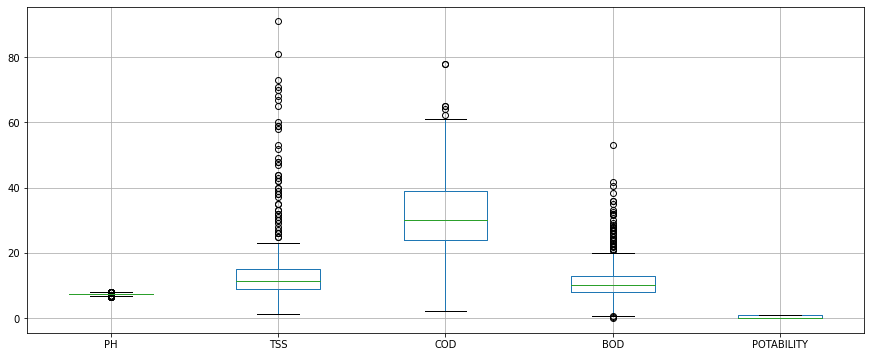

In [13]:
#CHECKING OUTLIERS USING BOXPLOT
df.boxplot(figsize=(15,6))
plt.show() #displays boxplot


In [14]:
# we are not removing outliers because they may decide the quality of water

In [15]:
df['POTABILITY'].value_counts() #used to count the occurrences of each unique value in the 'POTABILITY' column of the DataFrame df.

0    948
1    791
Name: POTABILITY, dtype: int64

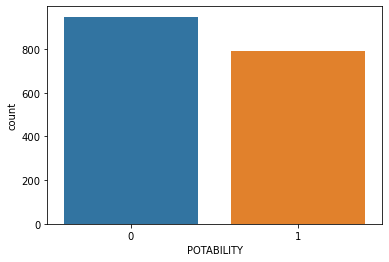

In [16]:
sns.countplot(df['POTABILITY'])
plt.show() #displays countplot of df


array([[<AxesSubplot:title={'center':'PH'}>,
        <AxesSubplot:title={'center':'TSS'}>],
       [<AxesSubplot:title={'center':'COD'}>,
        <AxesSubplot:title={'center':'BOD'}>],
       [<AxesSubplot:title={'center':'POTABILITY'}>, <AxesSubplot:>]],
      dtype=object)

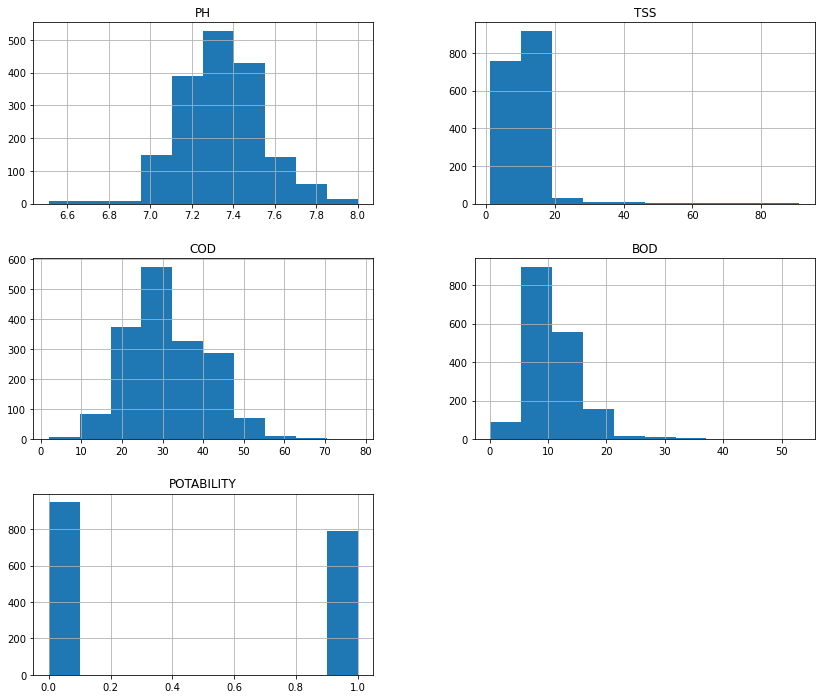

In [17]:
df.hist(figsize=(14,12))

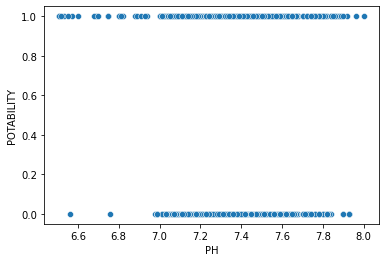

In [18]:
sns.scatterplot(x=df['PH'],y=df['POTABILITY'])
plt.show()


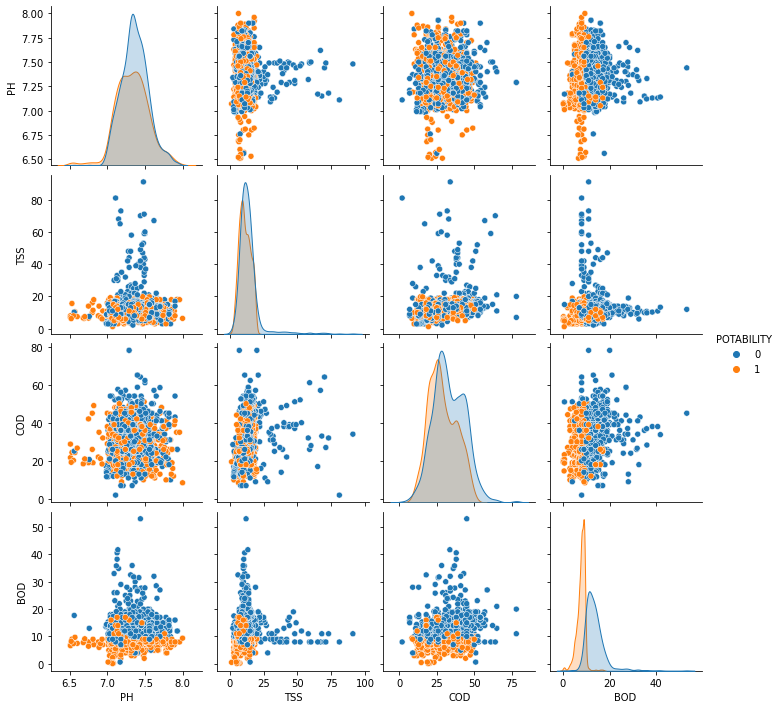

In [19]:
sns.pairplot(df,hue='POTABILITY')
plt.show()


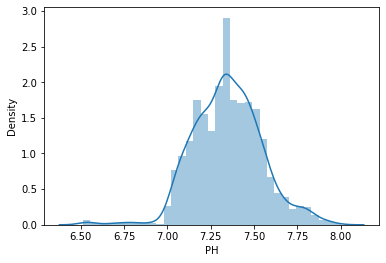

In [20]:
sns.distplot(df['PH'])
plt.show()


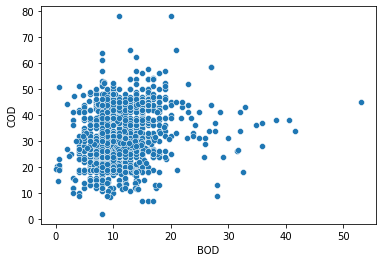

In [21]:
sns.scatterplot(df['BOD'],df['COD'])
plt.show()

In [22]:
#Partitioning of data
X=df.drop('POTABILITY',axis=1) #input variables
X


,PH,TSS,COD,BOD
0,7.20,13.0,31.0,7.0
1,7.40,13.0,26.0,9.0
2,7.46,14.0,43.0,8.0
3,7.46,12.0,46.0,10.0
4,7.44,13.0,44.0,9.0
...,...,...,...,...
1734,7.18,13.0,36.0,7.0
1735,7.05,10.0,26.0,16.0
1736,7.03,11.0,21.0,9.0
1737,7.07,11.0,26.0,9.0


In [23]:
Y=df['POTABILITY']  #Target variable
Y

0       1
1       1
2       1
3       0
4       1
       ..
1734    0
1735    1
1736    0
1737    0
1738    1
Name: POTABILITY, Length: 1739, dtype: int64

In [24]:
#SPLITTING THE DATA INTO TRAINING AND TESTING DATASET
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=0)
X_train


,PH,TSS,COD,BOD
198,7.24,7.00,22.00,9.00
557,7.34,15.00,42.00,8.00
512,7.06,13.00,38.00,8.00
1042,7.49,16.67,38.44,10.35
317,7.33,7.00,15.00,9.00
...,...,...,...,...
835,7.15,68.00,33.00,11.00
1216,7.23,9.00,45.00,12.00
1653,7.40,11.00,19.00,9.00
559,7.18,13.00,35.00,9.00


In [25]:
#MODEL FITTING 
#1.DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
df=DecisionTreeClassifier(criterion= 'gini', min_samples_split=9, splitter= 'best')
df
df.fit(X_train,Y_train)
#Prediction for test dataset
prediction=df.predict(X_test)
prediction


array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,

In [26]:
#DETERMINING ACCURACY
accuracy_score(prediction,Y_test)
print('accuracy_score:',accuracy_score(prediction,Y_test)*100,'%')

accuracy_score: 97.12643678160919 %


In [27]:
#FEATURE IMPORTANCES
print("feature importances:\n{}".format(df.feature_importances_))

feature importances:
[0.00921897 0.07309981 0.02048971 0.89719151]


In [28]:
#CONFUSION MATRIX
confusion_matrix(prediction,Y_test)

array([[184,   3],
       [  7, 154]], dtype=int64)

In [29]:
#Prediction on only one DATAPOINT
X_DT=df.predict([[7.5,25,39,15]])
X_DT
#OUTPUT '0' PROVES THAT THAT THE GIVEN VALUES DO NOT LIE IN THE STANDARD RANGE. HENCE, THE SAMPLE OF WATER IS NOT POTABLE

array([0], dtype=int64)

In [30]:
#KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=22)
knn
knn.fit(X_train,Y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=22)

In [31]:
#PREDICTION OF TEST DATASET
prediction_knn=knn.predict(X_test)
prediction

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,

In [32]:
#DETERMING ACCURACY
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score:',accuracy_knn,'%')


accuracy_score: 93.67816091954023 %


In [33]:
confusion_matrix(prediction,Y_test)

array([[184,   3],
       [  7, 154]], dtype=int64)

In [34]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
#Model fitting for Naive bayes
classifier = GaussianNB()
classifier.fit(X_train, Y_train)


GaussianNB()

In [35]:
#Prediction for test data set
Y_pred  =  classifier.predict(X_test)
Y_pred


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,

In [36]:
#Accuracy 
ac = accuracy_score(Y_test,Y_pred)*100
print('accuracy_score:',accuracy_knn,'%')
ac


accuracy_score: 93.67816091954023 %


84.77011494252874

In [37]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm


array([[144,  47],
       [  6, 151]], dtype=int64)

In [38]:
#Logistic Regression Model
#Model fitting
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
#Prediction for test data set
prediction=df.predict(X_test)
prediction


array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,

In [39]:
#Accuracy
test_acc = accuracy_score(Y_test,prediction)
test_acc
print("The Accuracy for Test Set is {}".format(test_acc*100),'%')


The Accuracy for Test Set is 97.12643678160919 %


In [40]:
#confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(Y_test,prediction))

cm=confusion_matrix(Y_test,prediction)
cm


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       191
           1       0.96      0.98      0.97       157

    accuracy                           0.97       348
   macro avg       0.97      0.97      0.97       348
weighted avg       0.97      0.97      0.97       348



array([[184,   7],
       [  3, 154]], dtype=int64)

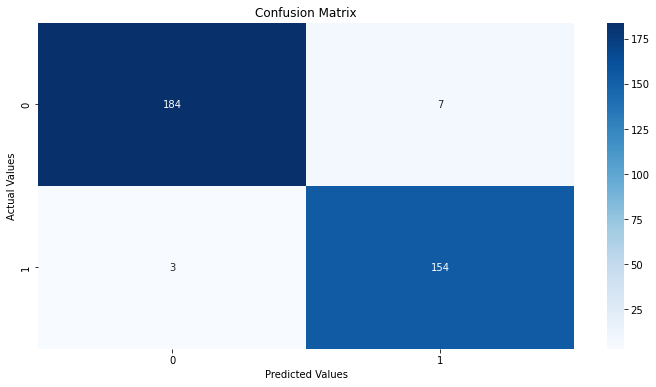

In [41]:
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')
